## main.py

1. import all necessary modules

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.preprocessing import image
from imblearn.over_sampling import SMOTE

sys.path.insert(0, os.path.abspath('./utils/'))
import util as utils

Using TensorFlow backend.


In [2]:
def get_model():
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
    model.add(layers.MaxPool2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(9, activation='softmax'))
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', 
                  metrics=['acc'])
    
    return model

In [3]:
dataset_dir = os.path.abspath('./dataset/')

train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')
test_dir = os.path.join(dataset_dir, 'test')

In [4]:
train_files = [ os.path.splitext(file)[0] for file in os.listdir(train_dir) ]
validation_files = [ os.path.splitext(file)[0] for file in os.listdir(validation_dir) ]
test_files = [ os.path.splitext(file)[0] for file in os.listdir(test_dir) ]

In [5]:
data_labels = { filename: label for filename, label in pd.read_csv('./trainLabels.csv').get_values() }

In [6]:
train_labels = [ data_labels.get(filename, filename) for filename in train_files ]
validation_labels = [ data_labels.get(filename, filename) for filename in validation_files ]
test_labels = [ data_labels.get(filename, filename) for filename in test_files ]

In [7]:
train_set = [ utils.load_image_as_np(os.path.join(train_dir, (filename+'.png'))) for filename in train_files ]
validation_set = [ utils.load_image_as_np(os.path.join(validation_dir, (filename+'.png'))) for filename in validation_files ]
test_set = [ utils.load_image_as_np(os.path.join(test_dir, (filename+'.png'))) for filename in test_files ]

In [8]:
train_set = np.asarray(train_set)
validation_set = np.asarray(validation_set)
test_set = np.asarray(test_set)

In [9]:
train_set = train_set.astype('float32') / 255
validation_set = validation_set.astype('float32') / 255
test_set = test_set.astype('float32') / 255

In [10]:
print('train_set.shape:       ', train_set.shape)
print('validation_set.shape:  ', validation_set.shape)
print('test_set.shape:        ', test_set.shape)

train_set.shape:        (4352, 128, 128, 1)
validation_set.shape:   (3258, 128, 128, 1)
test_set.shape:         (3258, 128, 128, 1)


In [11]:
train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

In [12]:
train_labels = np.delete(train_labels, 0, 1)
validation_labels = np.delete(validation_labels, 0, 1)
test_labels = np.delete(test_labels, 0, 1)

In [13]:
model = get_model()

In [14]:
history = model.fit(train_set, train_labels, batch_size=64, epochs=10, validation_data=(validation_set, validation_labels))

Train on 4352 samples, validate on 3258 samples
Epoch 1/10
4352/4352 [==============================] - 56s 13ms/step - loss: 1.1151 - acc: 0.6170 - val_loss: 0.6797 - val_acc: 0.7612
Epoch 2/10
4352/4352 [==============================] - 47s 11ms/step - loss: 0.6254 - acc: 0.7838 - val_loss: 0.5125 - val_acc: 0.8103
Epoch 3/10
4352/4352 [==============================] - 47s 11ms/step - loss: 0.4732 - acc: 0.8454 - val_loss: 0.3885 - val_acc: 0.8981
Epoch 4/10
4352/4352 [==============================] - 47s 11ms/step - loss: 0.3703 - acc: 0.8863 - val_loss: 0.4638 - val_acc: 0.8591
Epoch 5/10
4352/4352 [==============================] - 48s 11ms/step - loss: 0.3067 - acc: 0.9131 - val_loss: 0.3008 - val_acc: 0.9214
Epoch 6/10
4352/4352 [==============================] - 47s 11ms/step - loss: 0.2493 - acc: 0.9290 - val_loss: 0.3304 - val_acc: 0.9131
Epoch 7/10
4352/4352 [==============================] - 47s 11ms/step - loss: 0.2155 - acc: 0.9416 - val_loss: 0.2409 - val_acc: 0.9395


In [19]:
metrics = pd.Series(history.history)

In [22]:
epochs = range(1, len(metrics.acc) + 1)

<Figure size 432x288 with 0 Axes>

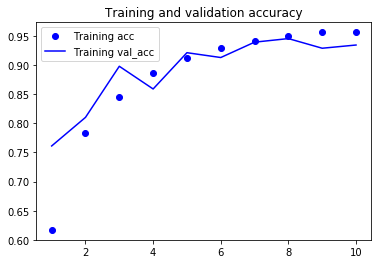

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(epochs, metrics.acc, 'bo', label='Training acc')
plt.plot(epochs, metrics.val_acc, 'b', label='Training val_acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

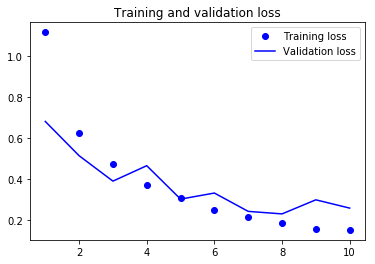

In [24]:
plt.plot(epochs, metrics.loss, 'bo', label='Training loss')
plt.plot(epochs, metrics.val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
sm = SMOTE()

In [26]:
train_set_res, train_labels_res = sm.fit_resample(train_set.reshape(train_set.shape[0], (128 * 128 * 1)), train_labels)

In [27]:
train_set_res = train_set_res.reshape((train_set_res.shape[0], 128, 128, 1))

In [28]:
print('train_set_res.shape:     ', train_set_res.shape)
print('train_labels_res.shape:  ', train_labels_res.shape)

train_set_res.shape:      (11088, 128, 128, 1)
train_labels_res.shape:   (11088, 9)


In [29]:
model2 = get_model()

In [30]:
history2 = model2.fit(train_set_res, train_labels_res, batch_size=64, epochs=10, validation_data=(validation_set, validation_labels))

Train on 11088 samples, validate on 3258 samples
Epoch 1/10
11088/11088 [==============================] - 107s 10ms/step - loss: 12.5750 - acc: 0.1580 - val_loss: 14.2678 - val_acc: 0.1148
Epoch 2/10
11088/11088 [==============================] - 106s 10ms/step - loss: 14.3272 - acc: 0.1111 - val_loss: 14.2678 - val_acc: 0.1148
Epoch 3/10
11088/11088 [==============================] - 110s 10ms/step - loss: 14.3272 - acc: 0.1111 - val_loss: 14.2678 - val_acc: 0.1148
Epoch 4/10
11088/11088 [==============================] - 107s 10ms/step - loss: 14.3272 - acc: 0.1111 - val_loss: 14.2678 - val_acc: 0.1148
Epoch 5/10
11088/11088 [==============================] - 108s 10ms/step - loss: 14.3272 - acc: 0.1111 - val_loss: 14.2678 - val_acc: 0.1148
Epoch 6/10
11088/11088 [==============================] - 107s 10ms/step - loss: 14.3272 - acc: 0.1111 - val_loss: 14.2678 - val_acc: 0.1148
Epoch 7/10
11088/11088 [==============================] - 108s 10ms/step - loss: 14.3272 - acc: 0.1111 - 

In [23]:
validation_labels.shape

(3258, 9)

In [24]:
train_labels.shape

(4352, 9)